In [1]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
###Decision Tree
accu_gini=85.0406060192 
accu_en=85.0337814782 
false_positive_rate_dt=[0,0.04981566,1]
true_positive_rate_dt=[0,0.53624009,1]
thresholds_dt=[2,1,0]
roc_auc_DT=0.743212213271
cm_dt= numpy.array([[10567,554],[1638,1894]])
gc_dt=0.486424426541



###Random Forest
accu_rf=84.8222207057
false_positive_rate_rf=[0,0.06654078,1]
true_positive_rate_rf=[0,0.57502831,1]
thresholds_rf=[2,1,0]
roc_auc_rf=0.754243766932
cm_rf=numpy.array([[10367,754],[ 1470,  2062]])
gc_rf=0.509786510843

###Naive Bayes
accu_nb=79.6082713438 
false_positive_rate_nb=[0,0.04828702, 1]
true_positive_rate_nb=[0,0.30605889,1 ]
thresholds_nb=[2,1,0]
roc_auc_nb=0.6288859328
cm_nb=numpy.array([[10584,537],[ 2451,1081]])
gc_nb=0.257771865599


###SVM
accu_svm=85.2264351814 
false_positive_rate_svm=[ 0.        ,  0.05936999,  1.        ]
true_positive_rate_svm=[ 0.        ,  0.56148981,  1.        ]
thresholds_svm=[2,1,0]
roc_auc_svm=0.7510599078
cm_svm=numpy.array([[8809,556],[1248,1598]])
gc_svm=0.502119815599

###NEURALNETWORK
accu_nn=0.8598
false_positive_rate_nn=[ 0.        ,  0.06990759,  1.        ]
true_positive_rate_nn=[ 0.        ,  0.61207646,  1.        ]
thresholds_nn=[2,1,0]
roc_auc_nn=0.771084430923
cm_nn=numpy.array([[6945,522], [ 893 ,1409]])
gc_nn= 0.542168861845

## ROC curve

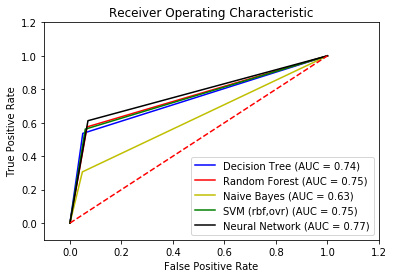

In [3]:
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_dt, true_positive_rate_dt, 'b',label='Decision Tree (AUC = %0.2f)'% roc_auc_DT)
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'r',label='Random Forest (AUC = %0.2f)'% roc_auc_rf)
plt.plot(false_positive_rate_nb, true_positive_rate_nb, 'y',label='Naive Bayes (AUC = %0.2f)'% roc_auc_nb)
plt.plot(false_positive_rate_svm, true_positive_rate_svm, 'g',label='SVM (rbf,ovr) (AUC = %0.2f)'% roc_auc_svm)
plt.plot(false_positive_rate_nn, true_positive_rate_nn, 'black',label='Neural Network (AUC = %0.2f)'% roc_auc_nn)



plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCplot.png',dpi= 300)
plt.show()


## Confusion Matrix

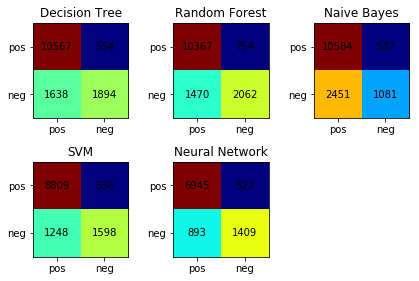

In [4]:
import numpy as np

fig = plt.figure()
plt.clf()
plt.tight_layout()

pos=1
cm_list=[]
cm_list.append(cm_dt)
cm_list.append(cm_rf)
cm_list.append(cm_nb)
cm_list.append(cm_svm)
cm_list.append(cm_nn)


# print(cm_list)
for conf_arr in cm_list:
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    
    ax = fig.add_subplot(2,3,pos)
    pos=pos+1
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    
    tle=["Decision Tree","Random Forest","Naive Bayes", "SVM","Neural Network"]
    plt.title(tle[pos-2])
    plt.xticks(range(width), ['pos','neg'])
    plt.yticks(range(height), ['pos','neg'])
plt.tight_layout()
plt.savefig('ConfusionMatrix.png',dpi=300)
plt.show()